In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
input = pd.read_csv('exzeo_data.csv')
input.head()
# input.describe()
# input[54,12]
from sklearn import preprocessing
headers = list(input.columns.values)
for i in headers:
    input[i] = preprocessing.LabelEncoder().fit(input[i]).transform(input[i])

input.head()

x1  x2  x3  x4  x5  x6  x7  x8  x9  x10  x11  x12  x13  x14  x15  x17  x18  \
0   1   4  42  18   1   1   1   2   1    2    1    3    0    0   32    9    0   
1   1   4  47  13   1   1   1   1   1    2    1    3    0    0   16   20    0   
2   1   4  64  16   1   1   1   1   1    2    1    3    0    1    9    5    0   
3   1   2  46   5   1   1   1   2   1    2    1    3    0    1    9    2    0   
4   1   1  58  19   1   1   0   3   1    2    1    3    0    0    9    5    0   

   x19  
0    3  
1    3  
2    3  
3    0  
4    3

In [2]:
def euclidian(a, b):
    return np.linalg.norm(a-b)


def kmeans1(dataset, k):
    history_centroids = []
    dist_method = euclidian
    dataset = dataset.as_matrix()
    num_instances, num_features = dataset.shape
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    history_centroids.append(prototypes)
    prototypes_old = np.zeros(prototypes.shape)
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > 0:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        prototypes_old = prototypes
        for index_instance, instance in enumerate(dataset):
            dist_vec = np.zeros((k, 1))
            for index_prototype, prototype in enumerate(prototypes):
                dist_vec[index_prototype] = dist_method(prototype,
                                                        instance)

            belongs_to[index_instance, 0] = np.argmin(dist_vec)

        tmp_prototypes = np.zeros((k, num_features))

        for index in range(len(prototypes)):
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            prototype = np.mean(dataset[instances_close], axis=0)
            # prototype = dataset[np.random.randint(0, num_instances, size=1)[0]]
            tmp_prototypes[index, :] = prototype

        prototypes = tmp_prototypes

        history_centroids.append(tmp_prototypes)

    # plot(dataset, history_centroids, belongs_to)
    return prototypes, history_centroids, belongs_to

In [22]:
def plot(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']
    dataset = dataset.as_matrix()
    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.pause(0.8)

In [87]:
from sklearn.metrics import silhouette_score
for n_cluster in range(2, 9):
    centroids, history_centroids, belongs_to = kmeans1(input,n_cluster)
    sil_coeff = silhouette_score(input, belongs_to, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

Helllo
Hello


/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



For n_clusters=2, The Silhouette Coefficient is 0.29845177144168505
Helllo
Hello
For n_clusters=3, The Silhouette Coefficient is 0.30709875981841545
Helllo
Hello
For n_clusters=4, The Silhouette Coefficient is 0.3030068577407267
Helllo
Hello
For n_clusters=5, The Silhouette Coefficient is 0.24108270808451635
Helllo
Hello
For n_clusters=6, The Silhouette Coefficient is 0.24655759914862482
Helllo
Hello
For n_clusters=7, The Silhouette Coefficient is 0.2297862596105836
Helllo
Hello
For n_clusters=8, The Silhouette Coefficient is 0.20669274487306408


In [3]:
centroids, history_centroids, belongs_to = kmeans1(input,3)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
a = pca.fit_transform(input)
type(a)

numpy.ndarray

In [5]:
d= pd.DataFrame({'R':a[:,0],'G':a[:,1],'B':a[:,2]})

In [6]:
c = pd.DataFrame({'R':a[:,0],'G':a[:,1],'B':a[:,2], 'Y':belongs_to[:,0]})

In [7]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go

In [8]:
import plotly
plotly.offline.init_notebook_mode()

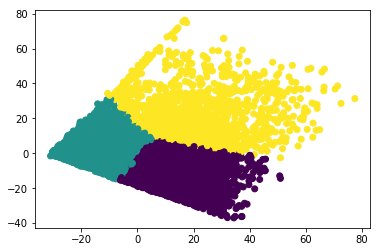

In [22]:
import pylab as pl
pca = PCA(n_components=3).fit(input)
pca_2d = pca.transform(input)
pl.figure('K-means with 3 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=belongs_to)
pl.show()

In [18]:
%matplotlib inline
cluster1=c.loc[c['Y'] == 0.0]
cluster2=c.loc[c['Y'] == 1.0]
cluster3=c.loc[c['Y'] == 2.0]
type(cluster1)
scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    marker = dict( size=2, color='red')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    color='red', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, cluster1, cluster2, cluster3], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.plot(fig, filename='mesh3d_sample.html')
# plotly.iplot(fig, filename='mesh3d_sample')

In [82]:
input["output"] = belongs_to
input.head()

x1  x2  x3  x4  x5  x6  x7  x8  x9  x10  x11  x12  x13  x14  x15  x17  x18  \
0   1   4  42  18   1   1   1   2   1    2    1    3    0    0   32    9    0   
1   1   4  47  13   1   1   1   1   1    2    1    3    0    0   16   20    0   
2   1   4  64  16   1   1   1   1   1    2    1    3    0    1    9    5    0   
3   1   2  46   5   1   1   1   2   1    2    1    3    0    1    9    2    0   
4   1   1  58  19   1   1   0   3   1    2    1    3    0    0    9    5    0   

   x19  output  
0    3     2.0  
1    3     0.0  
2    3     0.0  
3    0     0.0  
4    3     0.0

In [83]:
grouped = input.groupby(['output'], sort=True)

In [86]:
sums = grouped.sum()
sums
data = [go.Heatmap( z=sums.values.tolist(), 
                   y=['Persona A', 'Persona B', 'Persona C', 'Persona D'],
                   x=['Debit Card',
                      'Personal Credit Card',
                      'Business Credit Card',
                      'Home Mortgage Loan',
                      'Auto Loan',
                      'Brokerage Account',
                      'Roth IRA',
                      '401k',
                      'Home Insurance',
                      'Automobile Insurance',
                      'Medical Insurance',
                      'Life Insurance',
                      'Cell Phone',
                      'Landline'
                     ],
                   colorscale='Viridis')]

plotly.offline.iplot(data, filename='pandas-heatmap')


In [60]:
from sklearn.metrics import silhouette_score
for n_cluster in range(2, 5):
    centroids, history_centroids, belongs_to = kmeans1(d,n_cluster)
    sil_coeff = silhouette_score(d, belongs_to, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

Helllo
Hello


/home/akshay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For n_clusters=2, The Silhouette Coefficient is 0.3472782157939644
Helllo
Hello
For n_clusters=3, The Silhouette Coefficient is 0.36566636065371694
Helllo
Hello
For n_clusters=4, The Silhouette Coefficient is 0.36577714237102393
